<a href="https://colab.research.google.com/github/venkat2ram/AI_Playground/blob/main/House_Price_Prediction_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **This notebook is created to perform data analysis for House price prediction.**


Import packages.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


Import data using pandas.

In [2]:
dataset=pd.read_csv(r'C:\AI Practice\House Price Prediction - Kaggle\house-prices-advanced-regression-techniques\train.csv')
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**Get all the features with Null values**

In [3]:
features_with_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 ]

In [4]:
features_with_nan

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [5]:
for feature in features_with_nan:
  print(feature, 'has ', np.round(dataset[feature].isnull().mean(),4), '% of nan values')

LotFrontage has  0.1774 % of nan values
Alley has  0.9377 % of nan values
MasVnrType has  0.0055 % of nan values
MasVnrArea has  0.0055 % of nan values
BsmtQual has  0.0253 % of nan values
BsmtCond has  0.0253 % of nan values
BsmtExposure has  0.026 % of nan values
BsmtFinType1 has  0.0253 % of nan values
BsmtFinType2 has  0.026 % of nan values
FireplaceQu has  0.4726 % of nan values
GarageType has  0.0555 % of nan values
GarageYrBlt has  0.0555 % of nan values
GarageFinish has  0.0555 % of nan values
GarageQual has  0.0555 % of nan values
GarageCond has  0.0555 % of nan values
PoolQC has  0.9952 % of nan values
Fence has  0.8075 % of nan values
MiscFeature has  0.963 % of nan values


**As we have missing values for many features, We need to understand if the missing vaues have any effect on sales price. So, now for each feature which has missing values, compare the average salesprice for rows with missing value and rows without missing value.**

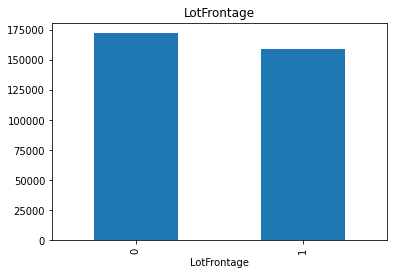

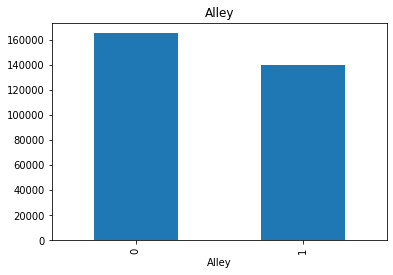

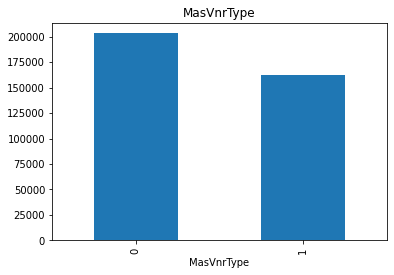

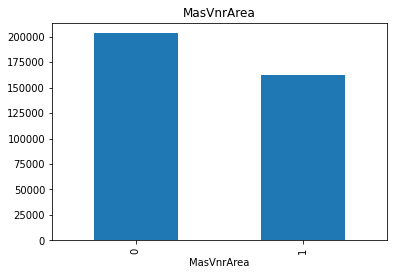

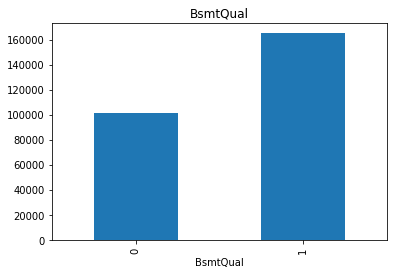

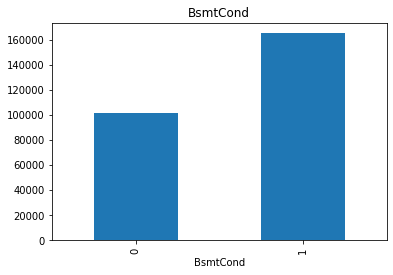

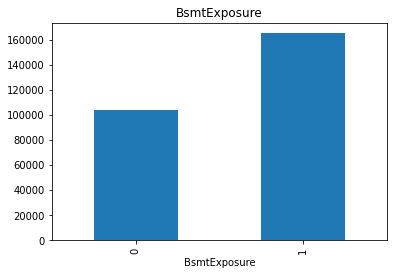

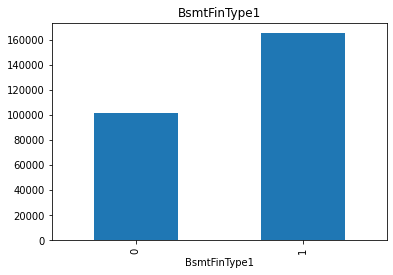

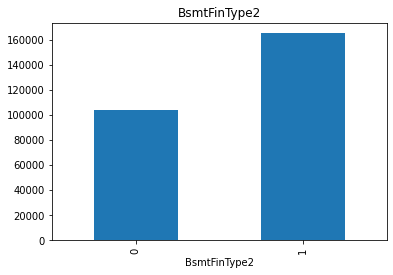

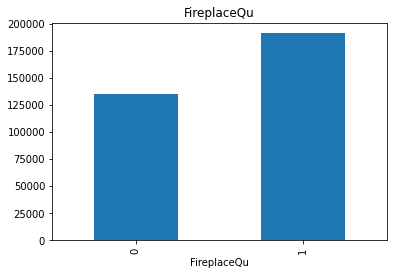

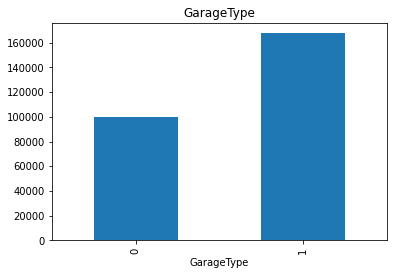

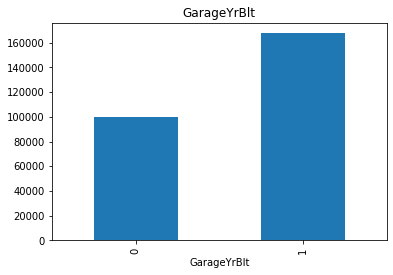

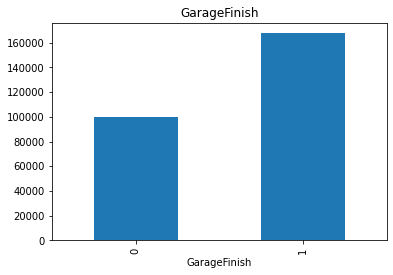

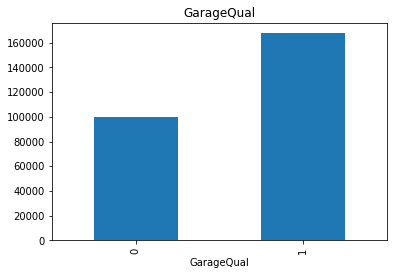

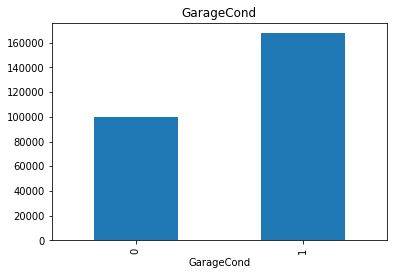

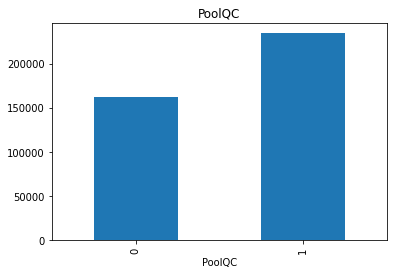

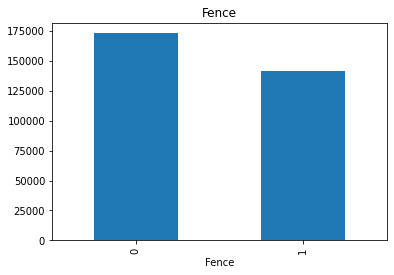

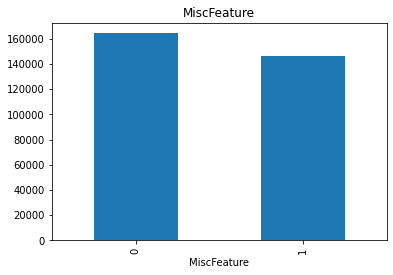

In [6]:
for feature in features_with_nan:
  data=dataset.copy()

  data[feature]=np.where(data[feature].isnull(),0,1)
  data.groupby(feature)['SalePrice'].median().plot.bar()
  plt.title(feature)
  plt.show()

**Here the affect of missing values on salesprice is clearly visible. So we need to replace the missing values with proper values. We will do it in feature engineering.**


**Next, we need to identify Numerical features.**

In [7]:
features_with_Numeric=[feature for feature in dataset.columns if dataset[feature].dtypes!='O']
features_with_Numeric

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [8]:
dataset[features_with_Numeric]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


**Temporal Variables(Year):**
**Check if any features has year stored. For this check the feature names has 'Yr' or 'Year' in it's name. This is not proper way to check the data. Please go to data and see values for each feature.**


In [9]:
features_with_Yr=[feature for feature in features_with_Numeric if 'Yr' in feature or 'Year' in feature]
features_with_Yr

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

**Above features store years. check how the each feature is affecting sales price with respect to YrSold**

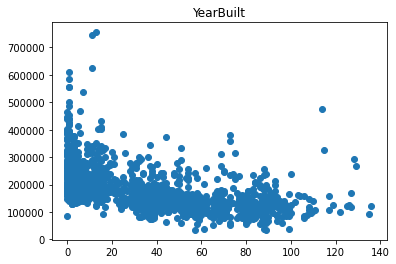

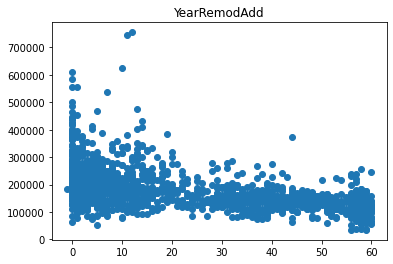

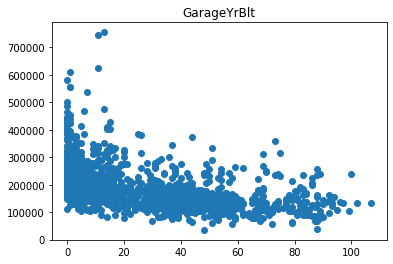

In [10]:
for feature in features_with_Yr:
  data=dataset.copy()
  if feature!='YrSold':
    data[feature]=data['YrSold']-data[feature]
    plt.scatter(data[feature],data['SalePrice'])
    plt.title(feature)
    plt.show()


Teh above plots clearly shows that SalePrice is affected by year.

**Descrete variables(Columns with lass number of unique values):**

In [11]:
features_descrete=[feature for feature in features_with_Numeric if len(dataset[feature].unique())<25 and feature not in features_with_Yr and feature!='Id' ]
features_descrete


['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

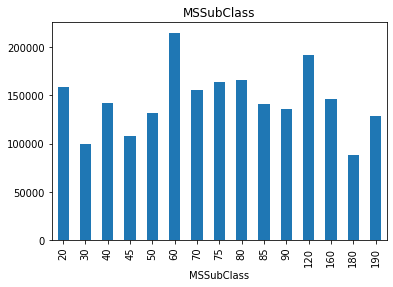

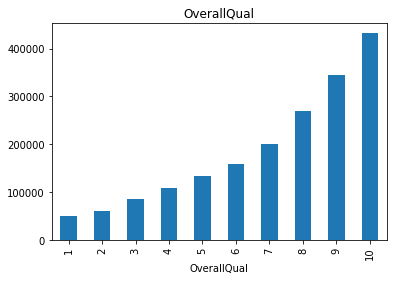

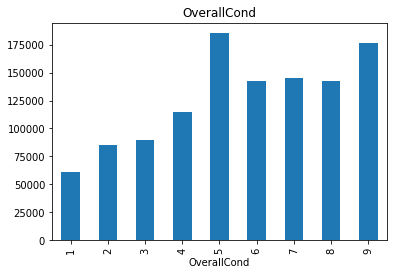

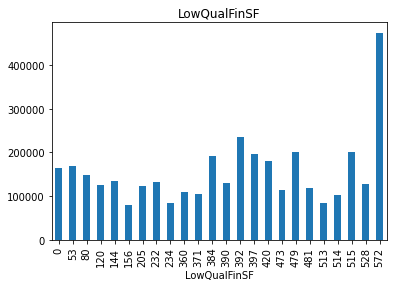

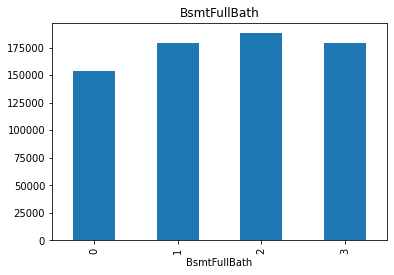

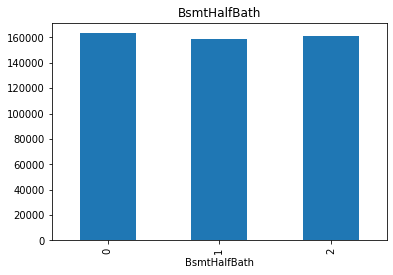

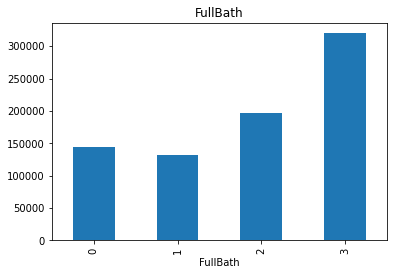

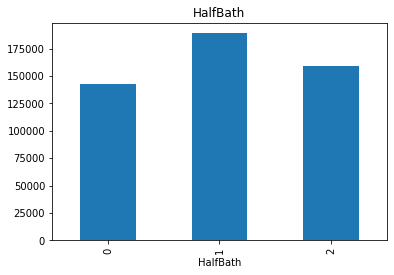

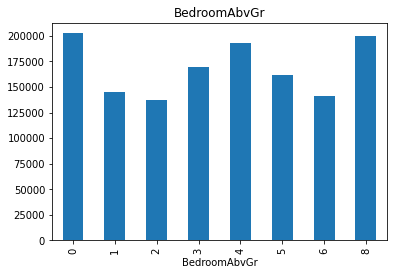

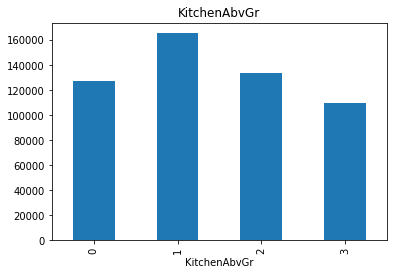

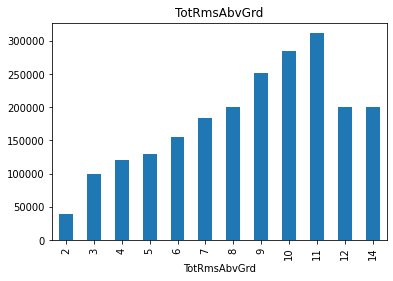

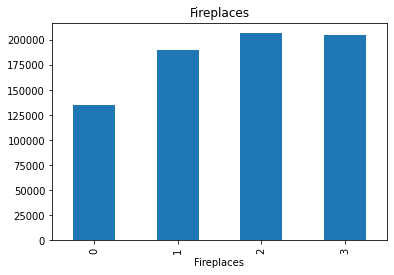

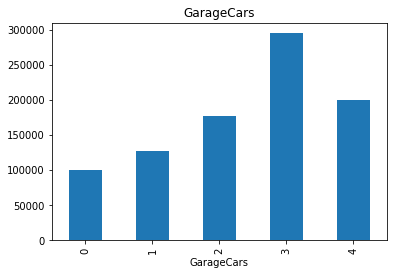

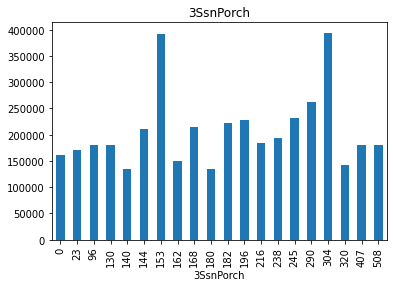

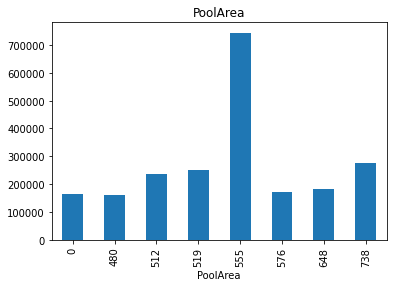

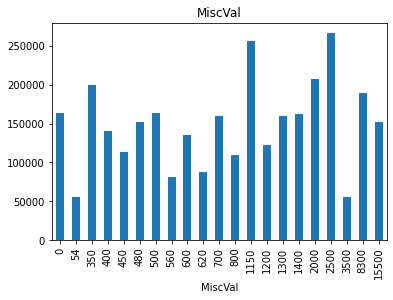

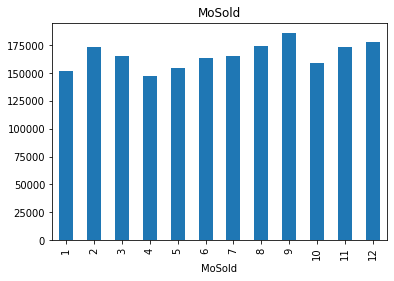

In [12]:
for feature in features_descrete:
  data=dataset.copy()

  data.groupby(feature)['SalePrice'].median().plot.bar()
  plt.title(feature)
  plt.show()

**Continous feature:**

In [14]:
continuous_feature=[feature for feature in features_with_Numeric if feature not in features_descrete+features_with_Yr+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 16


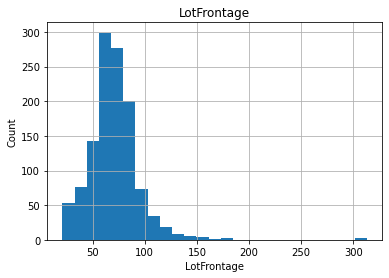

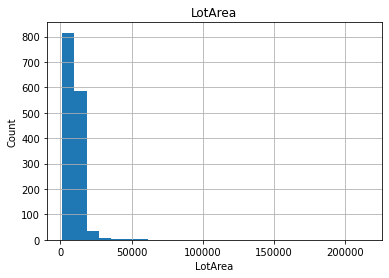

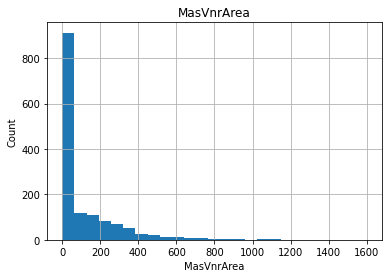

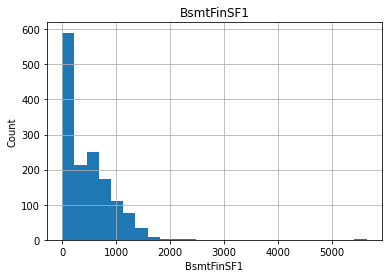

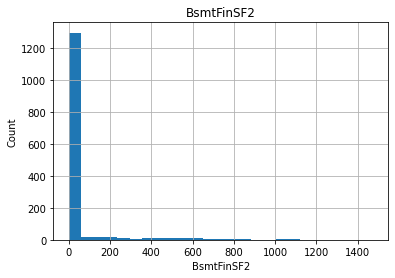

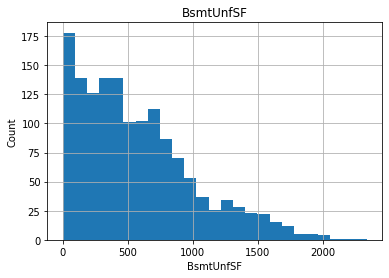

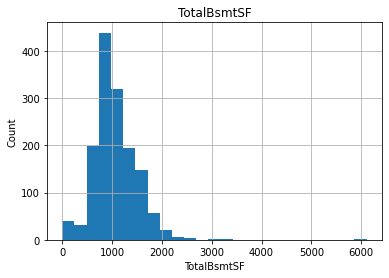

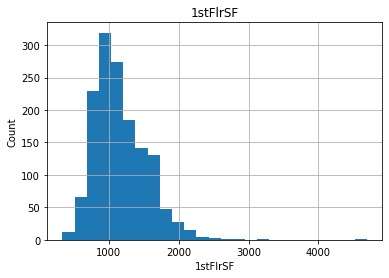

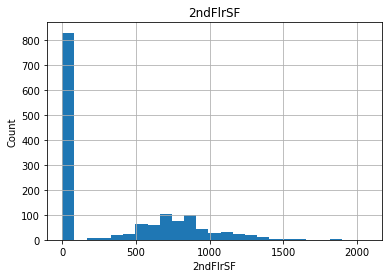

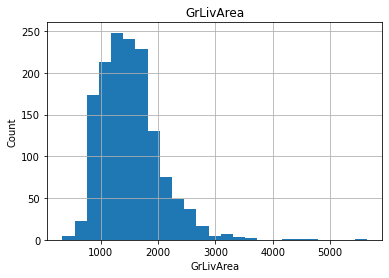

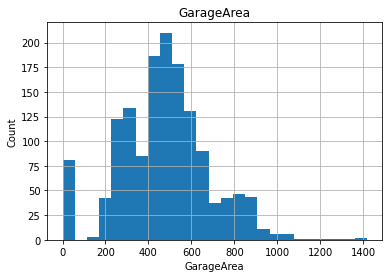

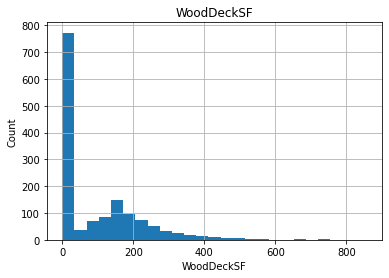

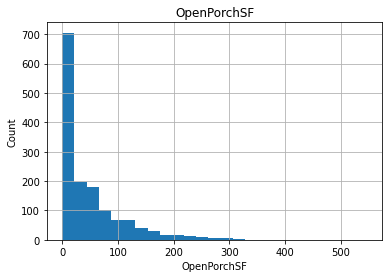

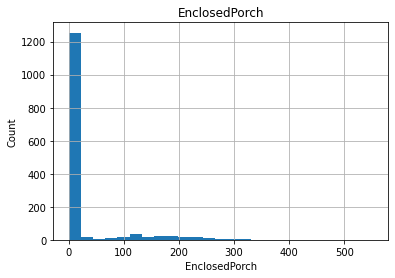

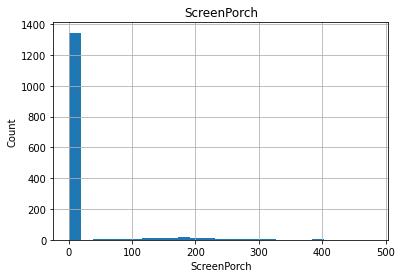

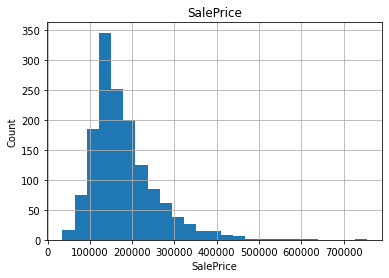

In [15]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()